In [1]:
import sys; sys.path.append('..')
from fcast import *
import gcsfs
%matplotlib inline

In [2]:
fs = gcsfs.GCSFileSystem(project='national-water-model')

In [3]:
date = '20190802' # a date
start_hr = '00' # start at 00:00 because its easy at the moment
comid = 4512772 # some small segment on the Potomac near DC
# comid = 229757 # the South Platte River in Denver
# comid = 7471678 # somewhere on the Mississippi River

In [4]:
x = Assim(fs, comid, date, start_hr)

In [5]:
x.copy_to_local(r'data\test')

In [5]:
x.assim_time

numpy.datetime64('2019-08-02T00:00:00.000000000')

In [6]:
sr = ShortRange(fs, comid, date, start_hr)

In [7]:
sr.copy_to_local(r'data\test')

In [7]:
df = sr.get_streamflow(x.assim_time, x.assim_flow)

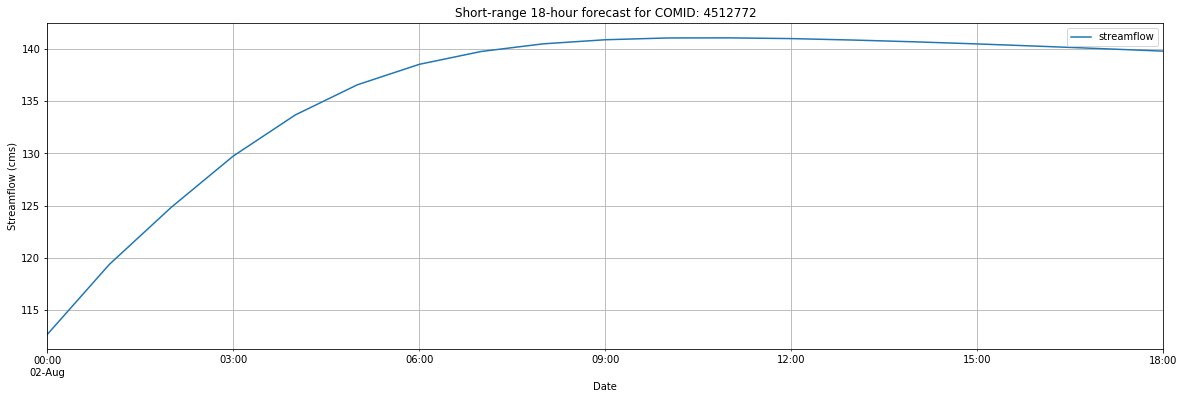

In [8]:
plotShortRange(df, comid)

In [9]:
sr.forecast_hours

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [9]:
res = get_USGS_rc(comid)
print(res[0])
res[1].head()

There is no rating curve available, please set `get_rc` = False for station 01646502


,INDEP,SHIFT,DEP,INDEP_SHIFT,INDEP_m,SHIFT_m,DEP_cms,INDEP_SHIFT_m
0,2.01,0.0,223.00,2.01,0.612648,0.0,6.314657,0.612648
1,2.02,0.0,226.14,2.02,0.615696,0.0,6.403572,0.615696
2,2.03,0.0,228.00,2.03,0.618744,0.0,6.456241,0.618744
3,2.04,0.0,230.80,2.04,0.621792,0.0,6.535528,0.621792
4,2.05,0.0,233.00,2.05,0.624840,0.0,6.597825,0.624840


In [6]:
mr = MediumRange(fs, comid, date, start_hr)

In [7]:
res = mr.get_NWM_rc()
print(res[0])
res[1].head()

,Stage,Discharge
0,0.0000,0.000000
1,0.3048,30.085741
2,0.6096,96.720480
3,0.9144,180.899337
4,1.2192,323.340296


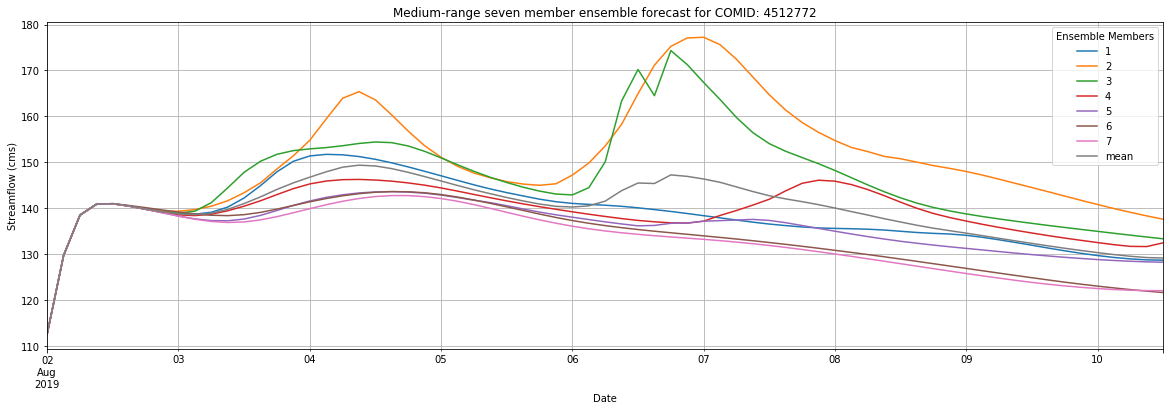

In [8]:
df = mr.get_streamflow(x.assim_time, x.assim_flow)
plotMediumRange(df, comid)

## Selecting specific members

In [8]:
mr = MediumRange(fs, comid, date, start_hr, members=[1,4,6])

In [9]:
mr.copy_to_local(r'data\test')

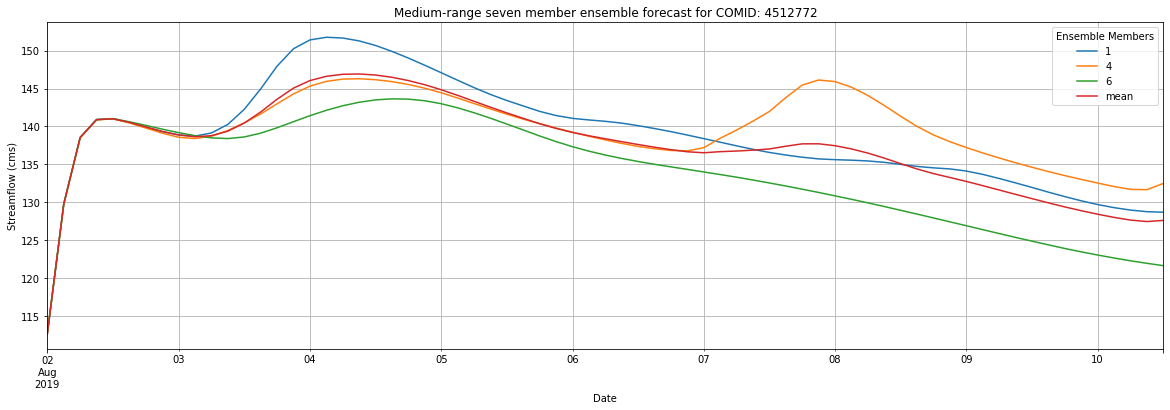

In [10]:
df = mr.get_streamflow(x.assim_time, x.assim_flow)
plotMediumRange(df, comid)

In [12]:
df.head()

,1,4,6,mean
2019-08-02 00:00:00,112.699997,112.699997,112.699997,112.699997
2019-08-02 03:00:00,129.759997,129.759997,129.759997,129.759997
2019-08-02 06:00:00,138.559997,138.529997,138.529997,138.539997
2019-08-02 09:00:00,140.929997,140.879997,140.889997,140.899997
2019-08-02 12:00:00,141.029997,140.989997,141.029997,141.016664
